# Matrix decompositions, types, and demonstration of their practical usefulness
The purpose of this notebook is to discuss in brief about 3 important matrix factorizations. For each factorization we will look at its computation and its practical usefullness. The matrix factorizations to be discussed are -
1) $LU$ Decompositoin
2) Eigen Value Decomposition
3) Singular Value Decomposition

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 1) $LU$ Decomposition
$$A = LU$$
Here $L = $ lower triangular matrix and $R =$ upper triangular matrix. Therefore $LU$ decomposition expresses the matrix $A$ as a product of an upper triangular and lower triangular matrix. for example, take
$$
A = \begin{bmatrix} 2 & 1 & -1 \\ -3 & -1 & 2 \\ -2 & 1 & 2 \end{bmatrix}
$$ then
$$
L = \begin{bmatrix} 1 & 0 & 0 \\ -\frac{3}{2} & 1 & 0 \\ -1 & 4 & 1 \end{bmatrix}, \quad
U = \begin{bmatrix} 2 & 1 & -1 \\ 0 & \frac{1}{2} & \frac{1}{2} \\ 0 & 0 & -1 \end{bmatrix}
$$


#### Computation
The key idea in computing $LU$ matrices involves converting $A$ in its row echlon form by performing elementary row operations.

##### Algorithm
1. **Initialize matrices $L$ and $U$**: Set the lower triangular matrix $L$ as an identity matrix and the upper triangular matrix $U$ as a copy of matrix $A$.

2. **Gaussian Elimination**:
    - For each column $k$ from 1 to $n-1$, perform Gaussian elimination to introduce zeros below the diagonal in column $k$ of matrix $U$.
    - **Select pivot element**: Choose a pivot element $U_{kk}$ from the diagonal of $U$. If $U_{kk} = 0$, perform row interchanges.
    - **Compute multipliers**: For each row $i$ below the pivot row, compute the multiplier $L_{ik} = \frac{U_{ik}}{U_{kk}}$.
    - **Eliminate elements below the pivot**: Subtract multiples of the pivot row from rows below it to introduce zeros below the pivot element in column $k$ of matrix $U$. Update corresponding elements of $L$ with the multipliers computed in the previous step.

3. **Result**: After completing the Gaussian elimination, matrix $U$ becomes upper triangular, and matrix $L$ contains the multipliers used during the elimination process to introduce zeros below the diagonal in $U$.

In [25]:
def lu_factorization(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()

    for k in range(n - 1):
        for i in range(k + 1, n):
            if U[k, k] != 0:
                factor = U[i, k] / U[k, k]
                L[i, k] = factor
                U[i, k:] -= factor * U[k, k:]
    
    return L, U

In [28]:
A = np.array([[ 2.,  1., -1.], [-3., -1.,  2.], [-2.,  1.,  2.]])
L, U = lu_factorization(A)
L, U, L @ U

(array([[ 1. ,  0. ,  0. ],
        [-1.5,  1. ,  0. ],
        [-1. ,  4. ,  1. ]]),
 array([[ 2. ,  1. , -1. ],
        [ 0. ,  0.5,  0.5],
        [ 0. ,  0. , -1. ]]),
 array([[ 2.,  1., -1.],
        [-3., -1.,  2.],
        [-2.,  1.,  2.]]))

#### Application
$LU$ factorization is mainly used for solving linear system of equations efficiently.
Consider a system of equation represented in matrix form
$$Ax=b$$
then this can be solved efficiently using $LU$ factorization
$$
\begin{align}
Ax &= b \\
LUx &= b \\
Ux &= L^{-1}b
\end{align}
$$
Then x can be computed using back substitution (as U is upper triangular matrix)
***Note***: Calculating $L^{-1}$ is a trivial task as $L$ is a  triangular matrix with digaonal elements equal to 1.

Consider the system of equations
$$
\begin{bmatrix} 2 & 1 & -1 \\ -3 & -1 & 2 \\ -2 & 1 & 2 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 1 \\ -2 \\ 3 \end{bmatrix}
$$

In [36]:
b = np.array([[1],[-2],[3]])
# Computing L^-1 . b
np.linalg.inv(L) @ b

array([[ 1. ],
       [-0.5],
       [ 6. ]])

$$
\begin{bmatrix} 2 & 1 & -1 \\ 0 & 0.5 & 0.5 \\ 0 & 0 & -1 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 1 \\ -0.5 \\ 6 \end{bmatrix}
$$
Using back substitution we get the result as
$x=-5\;y=5\;z=-6$

### 2) Eigen Value decomposition
$$A=V \Lambda V^{-1} $$
where
- $A$ is square matrix
- $V$ is a matrix whose columns are the eigenvectors of $A$.
- $\Lambda$ is a diagonal matrix containing the eigen values of matrix $A$

Eigenvalue decomposition (EVD), also known as spectral decomposition, is a fundamental matrix factorization technique that decomposes a square matrix into its constituent parts involving eigenvectors and eigenvalues.

Eigen values are special scaler and vector respectively which satisfy the equation
$$Av = \lambda v$$
Here $v$ is the eigenvector corresponding to eigenvalue $\lambda$ for A

In [9]:
(B @ V[:,0])

array([3.02945688, 1.31556754])

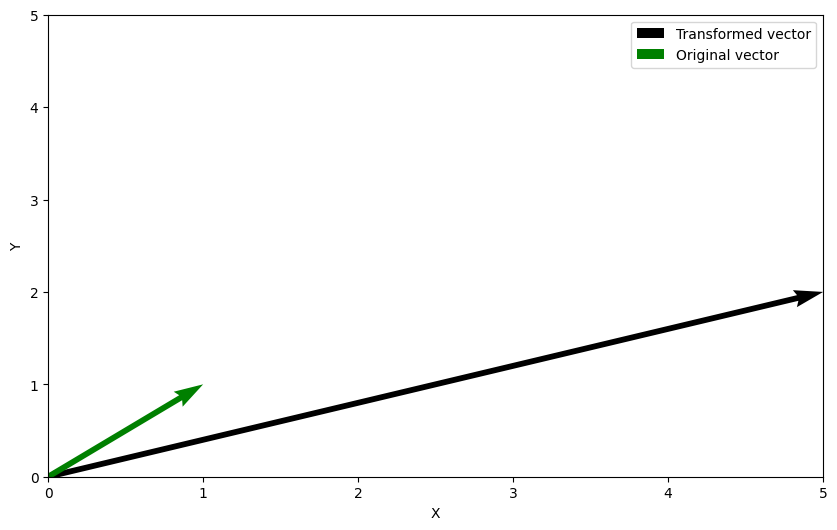

In [42]:
B = np.array([[2, 3], [1, 1]])
"""
np.linalg.eig

Description:
Function in numpy linear algebra submodule to calculate the eigen values and eigen vectors for a square matrix

returns -> [
lambda = Array of eigen values
V = Matrix of eigen vectors
]
"""
lamb, V = np.linalg.eig(B)

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Transformed vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Original vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Random vector's direction changes after transformation 
plot_vect(B @ np.array([1, 1]), np.array([1, 1]), (0, 5), (0, 5))

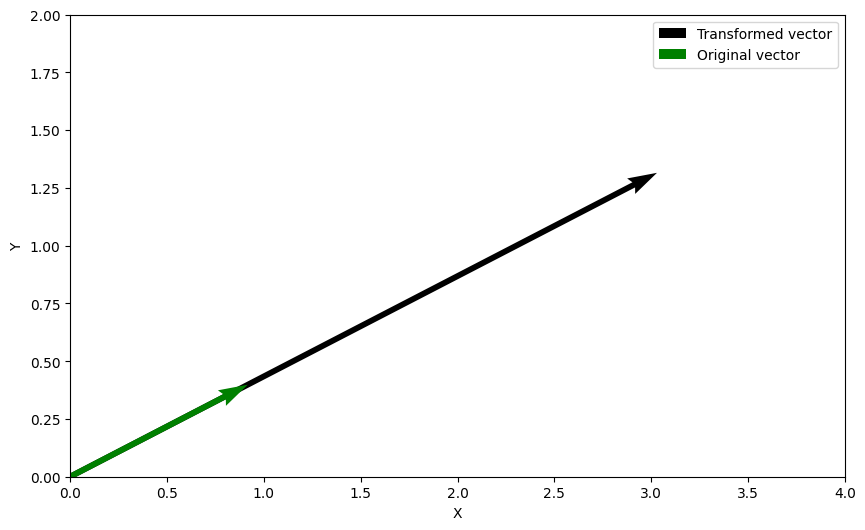

In [43]:
# Eigen vector retains its direction after transformation
plot_vect((B @ V[:,0]), V[:,0], (0,4),(0,2))

In [17]:
# Both are equal
(B @ V[:,0]) - lamb[0]*V[:,0]

array([ 4.44089210e-16, -2.22044605e-16])

#### Computation
1. **Compute eigenvalues ($\lambda_{i})$**: Compute the eigen values by solving for roots of the characteristic equation of matrix $A$ which is $$det(A - \lambda I) = 0$$
2. **Compute eigenvectors($v_{i})$** Computer eigen vectors by solving for nullspace of the matrix $A - \lambda I$
3. **Construct the Matrix of Eigenvectors and Eigenvalues**: Arrange the eigenvectors as columns in the matrix $V$ after normalising each eigenvector and construct $\Lambda$ such that each diagonal element contains the corresponding eigenvalue and set every non digaonal element to zero.
   $$\begin{align}&AV = \Lambda V \\ \Rightarrow &A=V \Lambda V^{-1} \end{align}$$
***Note***: For symmetric matrices ($S^{T} = S$), $V^{-1} = V^{T}$

#### Applications
Eigenvalues have a multitude of applications across various fields like principal component analysis in machine learning, solving linear ordinary differential equations, spectral analysis etc. In this notebook we will demonstrate the use of eigen vector decomposition in image compression in the next section (As SVD is a more generalized form eigenvalue decomposition).

### 3) Singular Value decomposition
$$A=U \Sigma V^{T} $$
where
- $A$ is $n \times m$ dimensional matrix
- $U$ is an $n \times n$ orthornormal matrix whose columns vectors are eigenvectors of $AA^{T}$.
- $V^{T}$ is an $m \times m$ orthornormal matrix whose columns vectors are eigenvectors of $A^{T}A$.
- $\Sigma$ is a $n \times m$ diagonal matrix containing the singular values of matrix $A$

It decomposes a matrix into three constituent matrices, which provides valuable insights into the structure and properties of the original matrix.

#### Computation
Two identities help us in computing the singular value decomposition of a matrix
$$
AA^{T} = U \Sigma V^{T} V \Sigma U^{T} = U \Sigma^{2} U^{T}
$$
$$
A^{T}A = V \Sigma U^{T} U \Sigma V^{T} = V \Sigma^{2} V^{T}
$$

1. **Compute the Singular Values**: Singular values are the square roots of the eigenvalues of $A^{T}A$ or $AA^T$. They represent the scaling factors applied to each singular vector direction during the transformation.

2. **Find the Singular Vectors**: The left singular vectors $U$ and right singular vectors (V) are the eigenvectors of $AA^T$ and $A^TA$, respectively. These vectors form orthogonal bases that define the transformation space of the original matrix $A$.

3. **Construct the Diagonal Matrix of Singular Values**: Arrange the singular values in decreasing order along the diagonal of matrix $\Sigma$. The size of $\Sigma$ depends on the dimensions of $A$, with the smaller dimension determining the number of non-zero singular values.

4. **Complete the Decomposition**: Combine the matrices $U$, $\Sigma$, and $V^T$ to obtain the Singular Value Decomposition of $A$, where $A$ = $U \Sigma V^T$.

#### Applications
Here we will demonstrate the use of SVD in image compression. SVD reduces the dimensionality of the image while preserving the information content of the image.

-The image is initially represented as a matrix where each element corresponds to the intensity of a pixel. For a grayscale image, this matrix is typically a two-dimensional array. SVD is then performed on this two dimension matrix to get $U, \Sigma$ and $V^{T}$. 

-The singular values in the diagonal matrix $\Sigma$ are sorted in decreasing order. To compress the image, only the first $k$ singular values and their corresponding columns in $U$ and rows in $V^T$ are retained, while the rest are discarded. This effectively reduces the dimensions of the matrices and hence the amount of information needed to represent the image

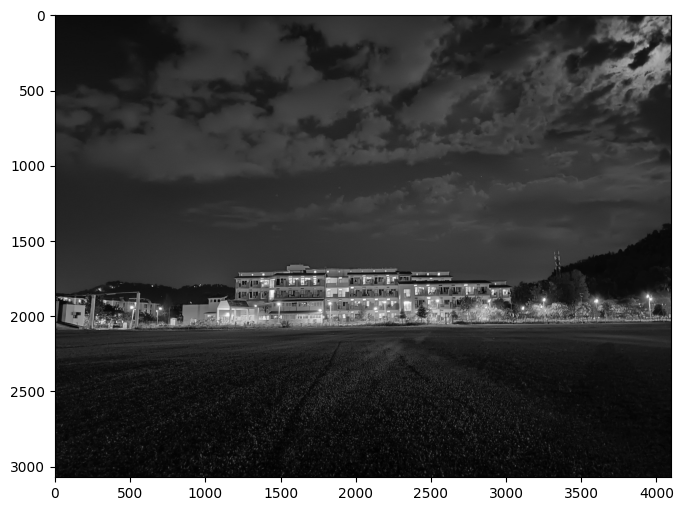

In [22]:
from PIL import Image

img = Image.open('input/image.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(10, 6))
plt.imshow(imggray);

In [29]:
# Preprocessing to convert the image data into a numpy matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [31]:
type(imgmat)

numpy.matrix

In [34]:
imgmat.shape

(3072, 4096)

In [35]:
U, sigma, V = np.linalg.svd(imgmat)

In [36]:
# number of singular values
len(sigma)

3072

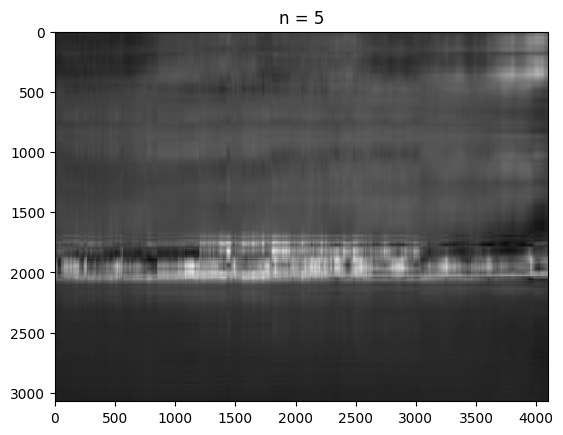

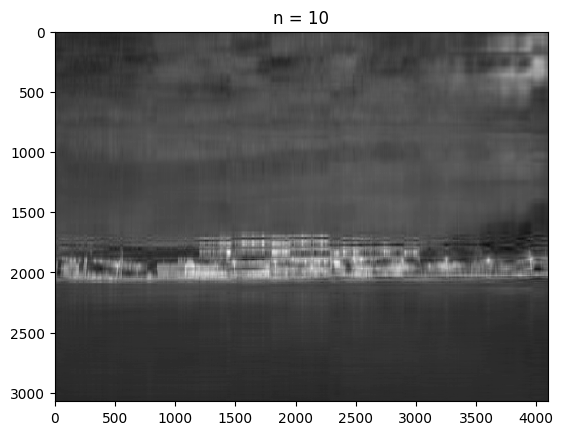

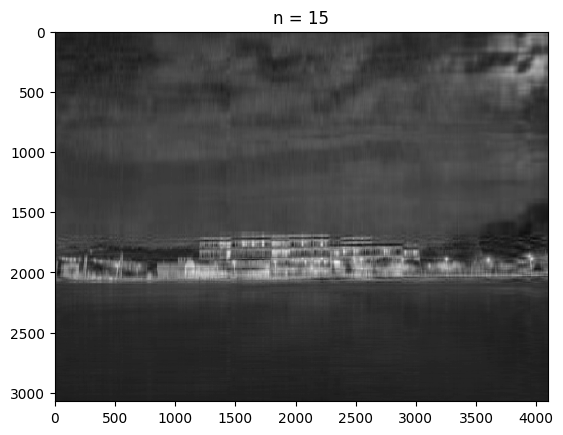

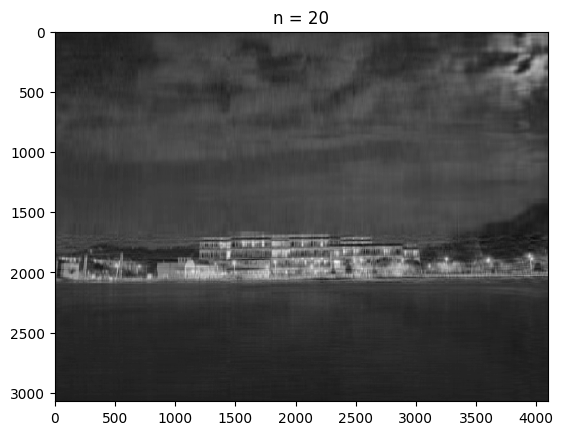

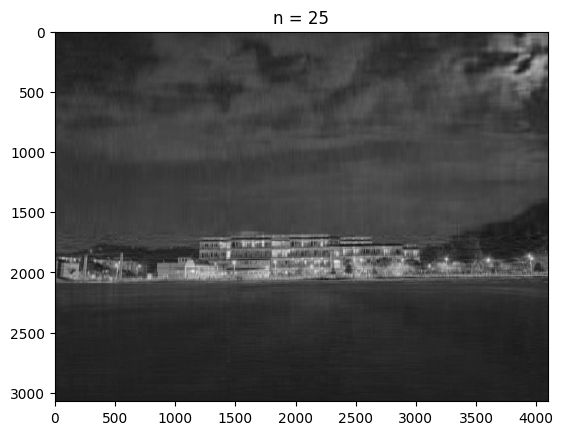

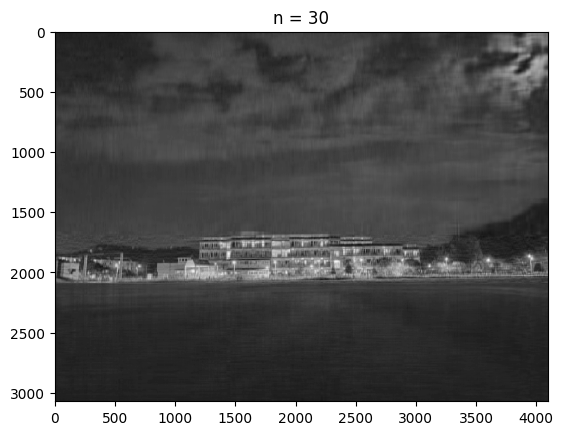

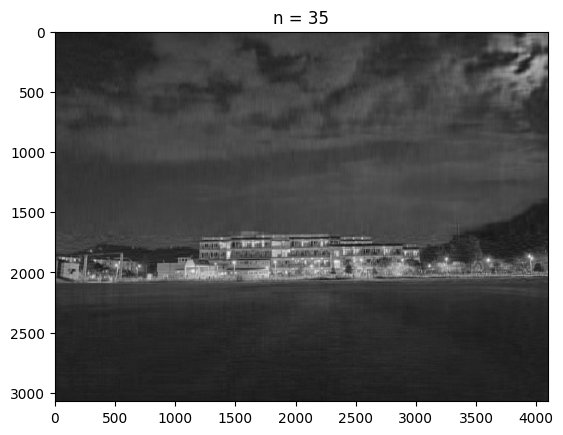

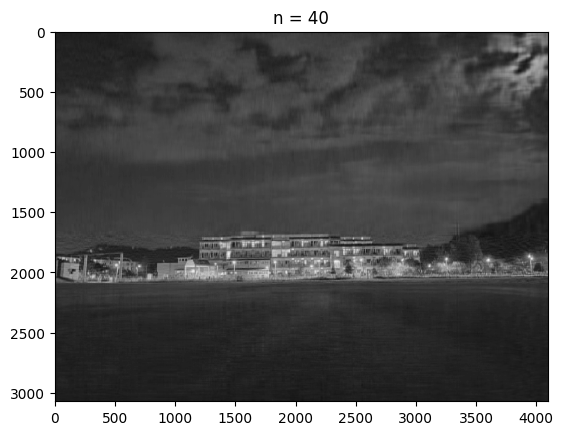

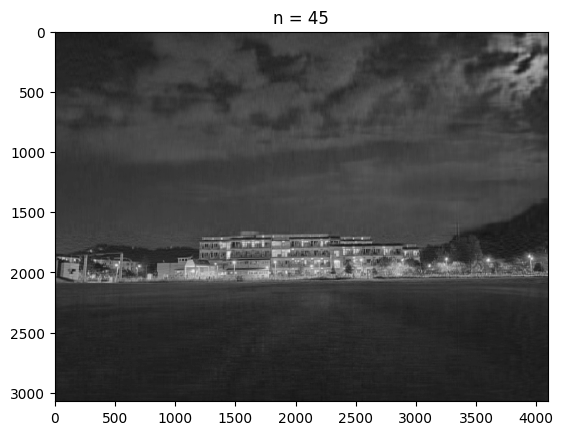

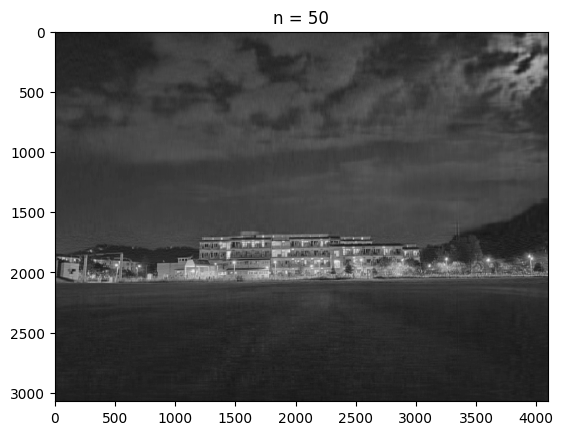

In [38]:
# Reconstructing the image with n number of singular values
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

By retaining only the most significant singular values and their corresponding vectors, SVD-based image compression preserves the essential features of the image while discarding redundant information. The amount of compression achieved depends on the number of signular values used for reconstructions, which determines the rank of the approximation.
